# Isolation of gas stations that only have access to single phase electrical connection:

### Printing all layers from given dataset:

In [1]:
# Printing all the layers in the dataset:
import fiona
from pyproj import CRS
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
from operator import itemgetter
from scipy.spatial import cKDTree
from shapely.geometry import Point, LineString

fiona.listlayers("/Users/TEJAS/LSDM/ICADisplay.gdb")

['SubstationLoadProfile',
 'LineDetail',
 'ICANotAvailable',
 'FeederDetail',
 'Substations',
 'FeederLoadProfile']

### Reading and Printing individual layers:

In [2]:
SubstationLoadProfileData = gpd.read_file("/Users/TEJAS/LSDM/ICADisplay.gdb", driver='FileGDB', layer=0)

In [3]:
LineDetailData = gpd.read_file("/Users/TEJAS/LSDM/ICADisplay.gdb", driver='FileGDB', layer=1)

In [4]:
LineDetailData

,FeederId,FeederName,Globalid,CSV_LineSection,ICA_Analysis_Date,LoadCapacity_kW,GenCapacity_kW,GenericPVCapacity_kW,GenCapacity_no_OpFlex_kW,GenericCapacity_no_OpFlex_kW,Shape_Length,geometry
0,043432102,SILVERADO 2102,{8909E068-F9A8-47CA-833E-C5D65F42B5B1},3697490,Dec 2019,0,160,200,370,450,100.191622,"MULTILINESTRING ((550623.065 4257325.813, 5506..."
1,252052119,ASHLAN AVE 2119,{25BE21A4-FFAD-415D-A9AB-B13ED2026086},5239640,Apr 2020,2130,0,0,2380,2960,104.255525,"MULTILINESTRING ((784567.125 4079572.893, 7845..."
2,043432102,SILVERADO 2102,{3129E4D3-11E0-48CE-AA78-AD0C242D39B3},3724483,Dec 2019,0,160,200,370,450,84.278226,"MULTILINESTRING ((550702.255 4257386.973, 5506..."
3,043432103,SILVERADO 2103,{0712C962-E3D6-4FB7-9D43-C9F322CBDA45},5093805,Dec 2019,0,0,0,570,790,33.231691,"MULTILINESTRING ((550503.215 4257009.053, 5505..."
4,012221106,NEWARK 1106,{0AAA5B38-A8EA-45F4-BAF1-A6D734E425D6},3066797,Feb 2020,350,0,700,0,700,61.565807,"MULTILINESTRING ((588448.655 4154903.543, 5884..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1181262,083242111,MORGAN HILL 2111,{AA2AFED6-D4B5-4126-8D7A-B626DC8AE43F},3744187,Jan 2020,7730,0,0,0,0,6.374363,"MULTILINESTRING ((619007.015 4110191.073, 6190..."
1181263,083242105,MORGAN HILL 2105,{3E9698FD-AF35-4957-9FEB-57D18EDE0415},3809175,Apr 2020,920,50,200,50,290,9.144098,"MULTILINESTRING ((620828.315 4106995.263, 6208..."
1181264,083242105,MORGAN HILL 2105,{E1D6EC66-0C68-4E6A-B6FD-DD371A6E689D},4316017,Apr 2020,840,50,200,50,290,3.744489,"MULTILINESTRING ((620784.255 4106974.123, 6207..."
1181265,083242105,MORGAN HILL 2105,{3D6CDBE5-18BE-45D2-B22D-B283769F5D24},4698032,Apr 2020,910,50,200,50,290,48.668447,"MULTILINESTRING ((621384.815 4106364.543, 6214..."


In [5]:
ICANotAvailableData = gpd.read_file("/Users/TEJAS/LSDM/ICADisplay.gdb", driver='FileGDB', layer=2)

In [6]:
ICANotAvailableData

,FEEDER_ID,SHOW,NUMBEROFPHASES,GLOBALID,Shape_Length,geometry
0,182331101,1,2,{6B9665D6-06C7-4D8B-95F7-D4A3A3B94CFC},4.572020,"MULTILINESTRING ((623291.773 4063212.604, 6232..."
1,182671109,1,2,{F06CFDD2-0F60-443B-80E2-7827735DCCCE},146.336239,"MULTILINESTRING ((721893.471 3870544.022, 7218..."
2,182671109,1,2,{F06F0E8B-CEC9-438B-A84B-905C6355476F},115.390819,"MULTILINESTRING ((721838.704 3870474.995, 7218..."
3,182671109,1,2,{9D8A183E-B602-4357-A4E5-6177E8AF90D6},172.614567,"MULTILINESTRING ((721758.283 3870545.484, 7217..."
4,182671109,1,2,{57CF1F68-4FF9-435E-8017-716355AE29E3},182.221777,"MULTILINESTRING ((721812.841 3870636.503, 7218..."
...,...,...,...,...,...,...
675651,083242105,1,1,{7CFF5FE9-59D6-4D3C-B915-AC1FBBD78458},7.088652,"MULTILINESTRING ((617776.724 4106777.412, 6177..."
675652,083242105,1,2,{8075DED7-29D7-4DA9-99A1-60712F6667C8},4.571986,"MULTILINESTRING ((620887.837 4106955.992, 6208..."
675653,083242105,1,1,{E507FC4C-F053-4F18-8F58-DACE8DE10627},22.734421,"MULTILINESTRING ((621249.918 4106681.795, 6212..."
675654,083242105,1,1,{4288CB48-FC1C-4454-943C-AA7AB6B608E7},4.514833,"MULTILINESTRING ((621005.352 4107328.552, 6210..."


In [7]:
FeederDetailData = gpd.read_file("/Users/TEJAS/LSDM/ICADisplay.gdb", driver='FileGDB', layer=3)

In [8]:
SubstationsData = gpd.read_file("/Users/TEJAS/LSDM/ICADisplay.gdb", driver='FileGDB', layer=4)

## Observation of Dataset:

There are 6 layers in total as shown above. To get the coordinates of electrical feeder lines, we can the LineDetail layer and to get the number of phases for each feeder, we can use the ICANotAvailable layer.

### Using the shapefile of California Map as base for plotting dataset:

In [9]:
# Reading shapefile of California
states = gpd.read_file('usa-states-census-2014.shp')
California = states[states['NAME'] == 'California']
California.crs = "epsg:4326" # Default CRS
California = California.to_crs("EPSG:26910") # CRS of given dataset

### Plotting all the layers of dataset:

<AxesSubplot:>

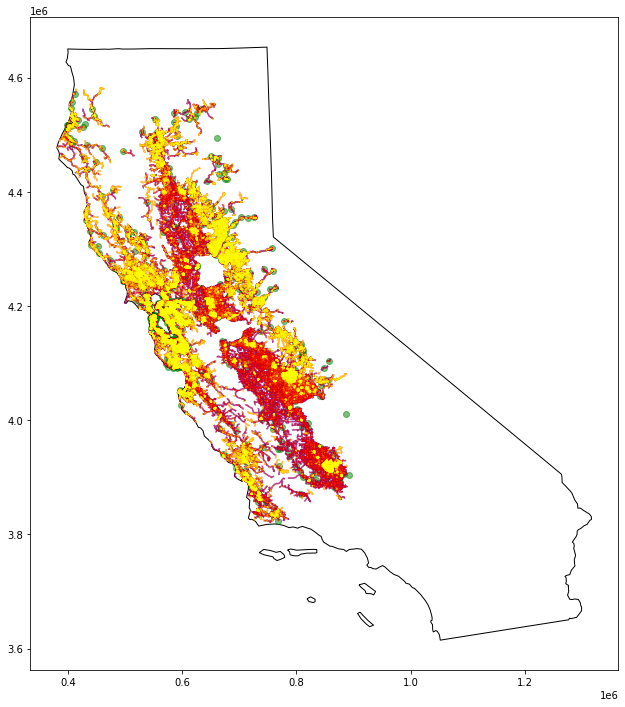

In [10]:
# Plotting entire dataset
base = California.plot(color='white', edgecolor='black', figsize=(12, 12))

LineDetailData.plot(ax=base, color='blue', alpha=.5)
FeederDetailData.plot(ax=base, color='red', alpha=.5)
SubstationsData.plot(ax=base, color='green', alpha=.5)
ICANotAvailableData.plot(ax=base, color='yellow', alpha=.5)

## Observation of Plotted Dataset:

The green dots represent the substations. The red color lines represents the feederDetail layer. The yellow color represents the feeder line details (ICANotAvailable layer) which also overlaps the blue color of the LineDetail layer.

The given dataset mostly represents the electrical grid architecture of a subsection of California and specifically the Northwestern part of California and does not contain any details about the southern part.

### Reading Gas station dataset:

In [11]:
# Reading Gas station dataset
df = pd.read_csv('/Users/TEJAS/LSDM/allCaliforniaGasGasLocations - allcalGasGasLocations.csv')
GasStationsData = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.long, df.lat))
GasStationsData.crs = "epsg:4326"
GasStationsData = GasStationsData.to_crs("EPSG:26910")

### Plotting Gas station Dataset along with FeederDetail Dataset:

<AxesSubplot:>

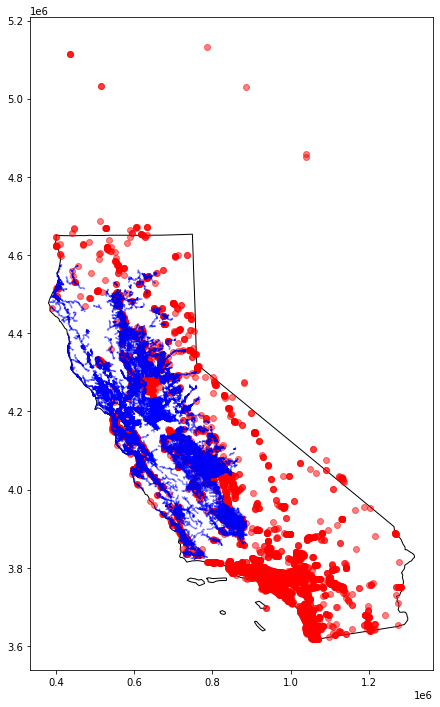

In [12]:
# Plotting Gas station and FeederDetail Dataset together:
base = California.plot(color='white', edgecolor='black', figsize=(12, 12))

GasStationsData.plot(ax=base, color='red', alpha=.5)
LineDetailData.plot(ax=base, color='blue', alpha=.5)

## Observation of plotted dataset:

The dataset for gas stations is provided for a much larger area than for the electrical grid dataset and only partially overlaps with it. Only gas stations that are close to the given electrical grid dataset must be isolated.

### Function for finding nearest feeder line to gas station:

The gas stations are actually a set of points (of Shapely library) and we need to find the closest feeder line to it. The feeder lines are actually a set of multilinestring objects (each multilinestring consists of a set of lines). Therefore, we need to convert each feeder line into a set of points and then find the distance between each point to the gas station and find the closest neighbour for a single gas station.

Thus, we create a ckDTree to find nearest neighbour (from scipy) which is faster than shapely's own nearestneighbour function and any other implementation of nearestneighbour currently available because of the Tree based approach used in the scipy method.

In [13]:
# Defining functions for finding nearest feederline to gas station (closest multilinestring to point)
def ckdnearest(gdfA, gdfB, gdfB_cols=['FeederID']):
    A = np.concatenate(
        [np.array(geom.coords) for geom in gdfA.geometry.to_list()])
    #print("A:",A)
    B = None
    B_ix = []
    for (indx,row) in gdfB.iterrows():
        b = [np.array(geom.coords) for geom in list(row.geometry.geoms)]
        B = np.concatenate(b) if B is None else np.concatenate((B,np.concatenate(b)))
        B_ix.append([indx]*(np.concatenate(b).size//2))
    B_ix = list(itertools.chain.from_iterable(B_ix))
    ckd_tree = cKDTree(B)
    dist, idx = ckd_tree.query(A, k=1)
    idx = itemgetter(*idx)(B_ix)
    return dist,idx

def get_nearest_gdf(dist,idx, gdfA, gdfB, gdfB_cols=['FeederID']):
    gdf = pd.concat(
        [gdfA, gdfB.loc[idx, gdfB_cols].reset_index(drop=True),
         pd.Series(dist, name='dist')], axis=1)
    return gdf

In [14]:
dist,idx = ckdnearest(GasStationsData, FeederDetailData)
GasStationMappedToFeederData = get_nearest_gdf(dist,idx,GasStationsData, FeederDetailData)

### Map Gas stations to feeder lines that are closer than 100 miles:

In [17]:
# Map Gas stations to feeder lines that are closer than 100 miles:
GasStationMappedToFeederData = GasStationMappedToFeederData[GasStationMappedToFeederData.apply(lambda x: x['dist'] < 100, axis=1)]
closest_feeders = GasStationMappedToFeederData['FeederID'].unique()

In [18]:
ClosestFeedersLineData = LineDetailData.loc[LineDetailData['FeederId'].isin(closest_feeders)]

In [20]:
ClosestFeedersWithPhaseData = ICANotAvailableData.loc[ICANotAvailableData['FEEDER_ID'].isin(closest_feeders)]
ClosestFeedersSinglePhaseData = ClosestFeedersWithPhaseData.loc[ClosestFeedersWithPhaseData['NUMBEROFPHASES']==1]
ClosestFeedersSinglePhase = ClosestFeedersSinglePhaseData['FEEDER_ID'].unique()

ClosestFeedersSinglePhaseLineData = ClosestFeedersLineData.loc[ClosestFeedersLineData['FeederId'].isin(ClosestFeedersSinglePhase)]
GasStationsSinglePhaseData = GasStationMappedToFeederData.loc[GasStationMappedToFeederData['FeederID'].isin(ClosestFeedersSinglePhase)]

### Plotting Gas station connected to Single Phase Feeder with Line Detail:

<AxesSubplot:>

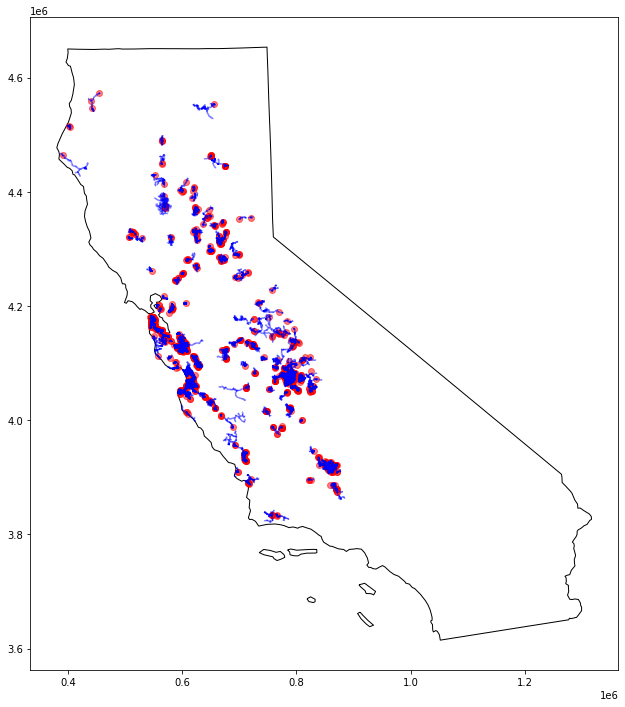

In [21]:
# Plotting Gas station connected to Single Phase Feeder with Line Detail:
base = California.plot(color='white', edgecolor='black', figsize=(12, 12))

GasStationsSinglePhaseData.plot(ax=base, color='red', alpha=.5)
ClosestFeedersSinglePhaseLineData.plot(ax=base, color='blue', alpha=.5)

## Observation of Plotted Result:

The gas stations (shown in red) and single phase feeder lines (shown in blue) are plotted.

We notice some clusters and isolated points in the above plot. There could be multiple factors attributed to their spread including, but not limited to, location of power grids connected to renewable energy sources for their power generation, geographical limitations, power demand in the location, etc.